## ABC-XYZ Inventory Classification Analysis

In [ ]:
# import the basic packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import datetime as datetime


In [ ]:
# !pip install inventorize3

In [ ]:
import inventorize3 as inv

In [ ]:
df = pd.read_csv('inventory_stock.csv')
df.head()

,Invoice_No,Item_Code,lower_floor,Item_Description,Quantity,UnitPrice,CustomerID,Invoice_Date
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,2022-12-01 08:26:00
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,3.39,17850.0,2022-12-01 08:26:00
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,2022-12-01 08:26:00
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,2022-12-01 08:26:00
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,2022-12-01 08:26:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Invoice_No        541909 non-null  object 
 1   Item_Code         541909 non-null  object 
 2   lower_floor       1816 non-null    object 
 3   Item_Description  540455 non-null  object 
 4   Quantity          541909 non-null  int64  
 5   UnitPrice         541909 non-null  float64
 6   CustomerID        406829 non-null  float64
 7   Invoice_Date      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.isnull().sum()

Invoice_No               0
Item_Code                0
lower_floor         540093
Item_Description      1454
Quantity                 0
UnitPrice                0
CustomerID          135080
Invoice_Date             0
dtype: int64

In [ ]:
df.isnull().sum()/len(df)*100

Invoice_No           0.000000
Item_Code            0.000000
lower_floor         99.664888
Item_Description     0.268311
Quantity             0.000000
UnitPrice            0.000000
CustomerID          24.926694
Invoice_Date         0.000000
dtype: float64

In [ ]:
# Checking the date range min and max date in datasets
print(df['Invoice_Date'].min(), df['Invoice_Date'].max())

2022-12-01 08:26:00 2023-12-09 12:50:00


### Data preprocessing and data cleaning

In [ ]:
# Dropping the lower_floor which has 99% missing values
df.drop(['lower_floor'], axis=1, inplace=True)

In [ ]:
# Filterout notnulls rows
df1 = df[df.notnull().all(axis=1)]

In [ ]:
df1.shape

(406829, 7)

In [ ]:
# Transform the CustomerID and Invoice_No as int
df1['CustomerID'] = df1['CustomerID'].astype("int64")

In [ ]:
# Filter the cancelled itom ie filter cancellation
df1=df1[df1["Invoice_No"].astype("str").str.get(0)!="C"]

In [ ]:
# Filter out the rows where Quentity is less than 0 or equal to 0
df1 = df1[df1['Quantity'] > 0]

In [ ]:
df1.shape

(397924, 7)

In [ ]:
df1.head()

,Invoice_No,Item_Code,Item_Description,Quantity,UnitPrice,CustomerID,Invoice_Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,2022-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850,2022-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,2022-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,2022-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,2022-12-01 08:26:00


In [ ]:
# Extract the order for 12 month period
df11 = df1.copy()

In [ ]:
df_filtered= df1[(df11['Invoice_Date'] >= '2022-12-01') & \
                                   (df11['Invoice_Date'] <'2023-12-01')]

In [ ]:
print(df_filtered['Invoice_Date'].min(), df_filtered['Invoice_Date'].max())

2022-12-01 08:26:00 2023-11-30 17:37:00


In [ ]:
df_filtered.head()

,Invoice_No,Item_Code,Item_Description,Quantity,UnitPrice,CustomerID,Invoice_Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,2022-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850,2022-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,2022-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,2022-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,2022-12-01 08:26:00


In [ ]:
# Calculate total price
df_filtered["Revenue"]=df_filtered["Quantity"]*df_filtered["UnitPrice"]

In [ ]:
# Dropout unnecessary columns
data_abc= df_filtered[['Item_Code','Item_Description','Quantity','Revenue']]

In [ ]:
data_abc.head()

,Item_Code,Item_Description,Quantity,Revenue
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,15.30
1,71053,WHITE METAL LANTERN,6,20.34
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,22.00
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,20.34
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,20.34


In [ ]:
data_abc.shape

(380620, 4)

In [ ]:
# Lets summarize the data for SKU's ( Per SKU Total Quantity & Total Revenue)
summaized_data= data_abc.groupby(['Item_Code','Item_Description']).agg(Quantity=('Quantity',np.sum),Revenue=('Revenue',np.sum)).reset_index()
summaized_data.head()

,Item_Code,Item_Description,Quantity,Revenue
0,10002,INFLATABLE POLITICAL GLOBE,823,699.55
1,10080,GROOVY CACTUS INFLATABLE,291,114.41
2,10120,DOGGY RUBBER,187,39.27
3,10123C,HEARTS WRAPPING TAPE,5,3.25
4,10124A,SPOTS ON RED BOOKCOVER TAPE,16,6.72


In [ ]:
summaized_data.shape

(3888, 4)

In [ ]:
# Lets classify the products to A B & C categories
data_abc_by_volume= inv.ABC(summaized_data[['Item_Description','Quantity']])

In [ ]:
# Lets check the classification by volume
data_abc_by_volume.head(5)

,Item_Description,Quantity,Percentage,comulative,Category
2100,MEDIUM CERAMIC TOP STORAGE JAR,77729,0.015882,0.015882,A
3019,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53052,0.010840,0.026721,A
3443,JUMBO BAG RED RETROSPOT,45126,0.009220,0.035941,A
3457,WHITE HANGING HEART T-LIGHT HOLDER,35980,0.007351,0.043293,A
3277,ASSORTED COLOUR BIRD ORNAMENT,34088,0.006965,0.050258,A


In [ ]:
# Lets check the classification by volume
data_abc_by_volume.tail(5)

,Item_Description,Quantity,Percentage,comulative,Category
3751,BLUE/NAT SHELL NECKLACE W PENDANT,1,2.043200e-07,0.999999,C
3649,CRACKED GLAZE EARRINGS BROWN,1,2.043200e-07,0.999999,C
2590,SET 10 CARDS HANGING BAUBLES 17080,1,2.043200e-07,1.000000,C
3387,BLOSSOM IMAGES SCRAP BOOK SET,1,2.043200e-07,1.000000,C
136,CHERRY BLOSSOM PURSE,1,2.043200e-07,1.000000,C


In [ ]:
# let us check the count of Categories
data_summary= data_abc_by_volume.groupby('Category').agg(Count=('Category',np.count_nonzero),Percentage=('Percentage',np.sum)).reset_index()
data_summary['Percentage']= data_summary['Percentage']*100
data_summary

,Category,Count,Percentage
0,A,875,79.970692
1,B,869,15.028514
2,C,2144,5.000794


Text(0.5, 1.0, 'SKUs by ABC Class')

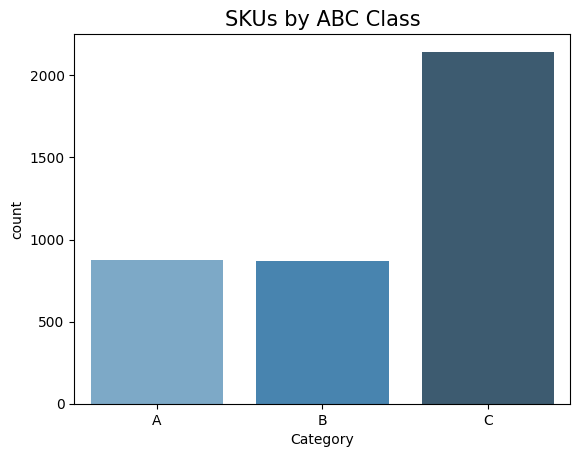

In [ ]:
# Lets plot the graph for count of Categories A, B, C
sns.countplot(x='Category',data=data_abc_by_volume, palette="Blues_d")\
                .set_title("SKUs by ABC Class",fontsize=15)

Text(0.5, 1.0, 'Quantity by ABC class')

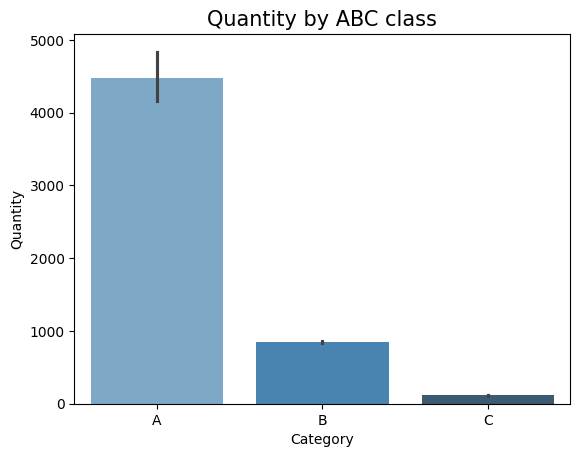

In [ ]:
# Lets plot the graph for volume of sales
sns.barplot(x='Category',y='Quantity',data=data_abc_by_volume,palette="Blues_d")\
                .set_title("Quantity by ABC class",fontsize=15)

In [ ]:
# Lets add the ABC classification for both Volume & Revenue
data_abc_by_multi_criteria= inv.productmix(summaized_data['Item_Description'],summaized_data['Quantity'],summaized_data['Revenue'])
data_abc_by_multi_criteria['abc_rank'] = data_abc_by_multi_criteria['comulative_revenue'].rank().astype(int)
data_abc_by_multi_criteria.head()

,skus,sales,revenue,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix,abc_rank
1318,REGENCY CAKESTAND 3 TIER,12020,138047.92,0.002456,0.181976,0.016448,0.016448,A,A,A_A,1
3457,WHITE HANGING HEART T-LIGHT HOLDER,35980,98452.36,0.007351,0.043293,0.011730,0.028178,A,A,A_A,2
3443,JUMBO BAG RED RETROSPOT,45126,83200.38,0.009220,0.035941,0.009913,0.038090,A,A,A_A,3
2100,MEDIUM CERAMIC TOP STORAGE JAR,77729,81213.22,0.015882,0.015882,0.009676,0.047766,A,A,A_A,4
3887,POSTAGE,2997,75043.96,0.000612,0.605935,0.008941,0.056707,A,A,A_A,5


In [ ]:
# let's chech each category sku counts
data_abc_by_multi_criteria.product_mix.value_counts()

product_mix
C_C    1800
A_A     561
B_B     402
C_B     285
A_B     272
B_C     270
B_A     197
C_A      59
A_C      42
Name: count, dtype: int64

<Axes: xlabel='product_mix', ylabel='count'>

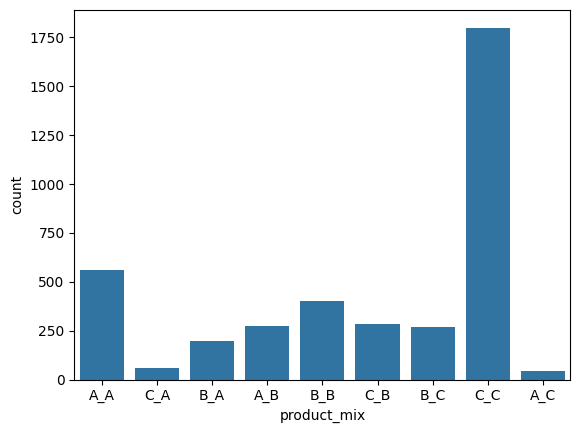

In [ ]:
# Let's visualize how many SKUs are there in each category
sns.countplot(x='product_mix',data=data_abc_by_multi_criteria)

<Axes: xlabel='product_mix', ylabel='revenue'>

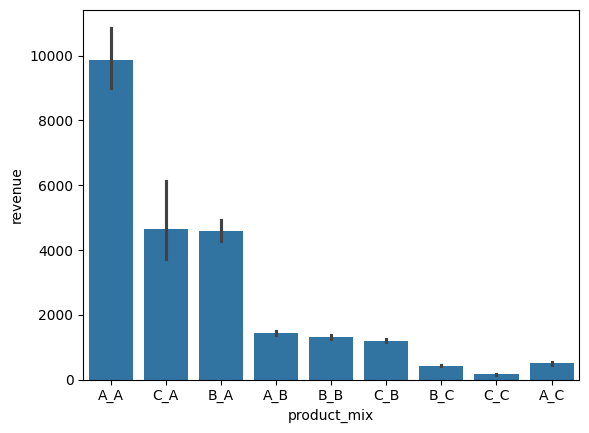

In [ ]:
#Let's visualize the revenue generated by each category
sns.barplot(x='product_mix',y='revenue',data=data_abc_by_multi_criteria)

In [ ]:
df_filtered["month"] = pd.to_datetime(df_filtered['Invoice_Date']).dt.month 
df_filtered.head()

,Invoice_No,Item_Code,Item_Description,Quantity,UnitPrice,CustomerID,Invoice_Date,Revenue,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,2022-12-01 08:26:00,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850,2022-12-01 08:26:00,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,2022-12-01 08:26:00,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,2022-12-01 08:26:00,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,2022-12-01 08:26:00,20.34,12


In [ ]:
df_filtered.tail()

,Invoice_No,Item_Code,Item_Description,Quantity,UnitPrice,CustomerID,Invoice_Date,Revenue,month
516364,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,1.25,15444,2023-11-30 17:37:00,5.00,11
516365,579885,21742,LARGE ROUND WICKER PLATTER,2,5.95,15444,2023-11-30 17:37:00,11.90,11
516366,579885,23084,RABBIT NIGHT LIGHT,6,2.08,15444,2023-11-30 17:37:00,12.48,11
516367,579885,21257,VICTORIAN SEWING BOX MEDIUM,1,7.95,15444,2023-11-30 17:37:00,7.95,11
516368,579885,21259,VICTORIAN SEWING BOX SMALL,1,5.95,15444,2023-11-30 17:37:00,5.95,11


In [ ]:
df_filtered.month.value_counts()

month
11    64545
10    49557
9     40030
5     28322
6     27185
3     27177
8     27013
7     26827
12    26160
4     22644
1     21232
2     19928
Name: count, dtype: int64

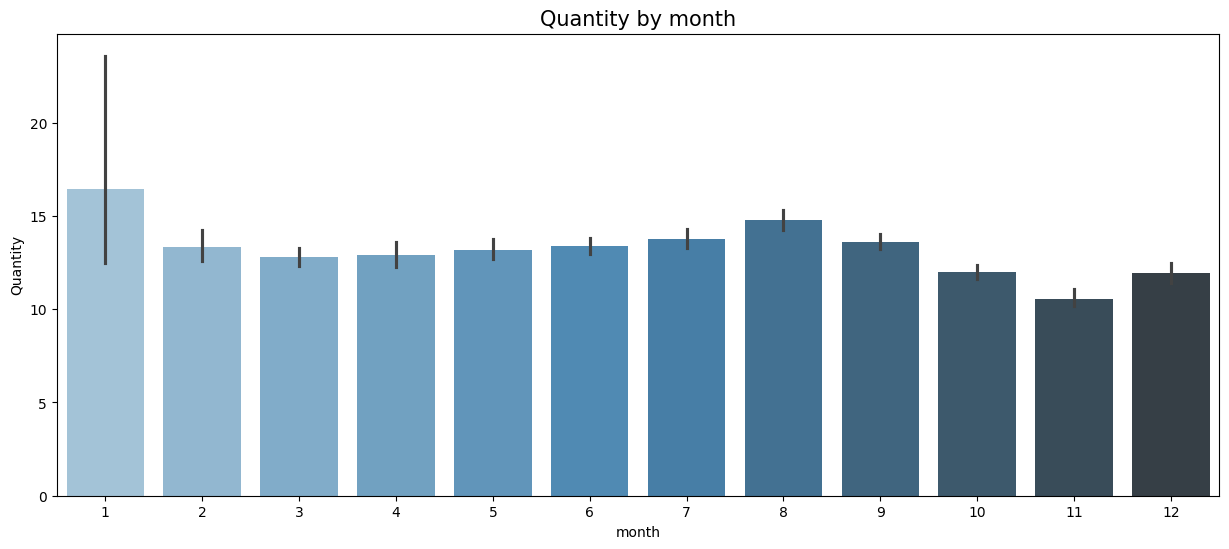

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="month", 
                 y="Quantity", 
                 data=df_filtered,
                 palette="Blues_d")\
                .set_title("Quantity by month",fontsize=15)

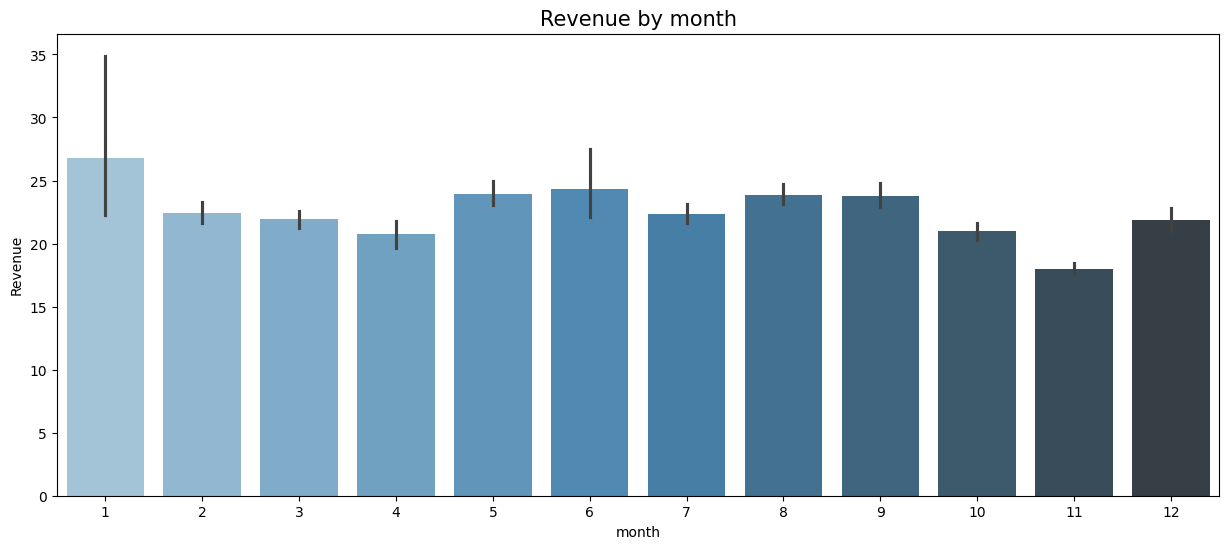

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="month", 
                 y="Revenue", 
                 data=df_filtered,
                 palette="Blues_d")\
                .set_title("Revenue by month",fontsize=15)

In [ ]:
summarized_data_by_month = df_filtered.groupby(['Item_Description','month'])['Quantity'].sum().to_frame().reset_index()
summarized_data_by_month.head()

,Item_Description,month,Quantity
0,4 PURPLE FLOCK DINNER CANDLES,1,2
1,4 PURPLE FLOCK DINNER CANDLES,2,1
2,4 PURPLE FLOCK DINNER CANDLES,4,8
3,4 PURPLE FLOCK DINNER CANDLES,5,3
4,4 PURPLE FLOCK DINNER CANDLES,6,2


In [ ]:
summarized_data_by_month = summarized_data_by_month.pivot(index='Item_Description', columns='month', values='Quantity')\
                           .add_prefix('month_').reset_index().fillna(0)
summarized_data_by_month.head()

month,Item_Description,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,4 PURPLE FLOCK DINNER CANDLES,2.0,1.0,0.0,8.0,3.0,2.0,3.0,1.0,9.0,3.0,45.0,14.0
1,50'S CHRISTMAS GIFT BAG LARGE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,329.0,993.0,485.0,0.0
2,DOLLY GIRL BEAKER,0.0,0.0,0.0,0.0,0.0,0.0,67.0,945.0,615.0,549.0,148.0,0.0
3,I LOVE LONDON MINI BACKPACK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,146.0,51.0,142.0,0.0
4,I LOVE LONDON MINI RUCKSACK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Calculate standard deviation in demand

summarized_data_by_month['std_demand'] = summarized_data_by_month[["month_1","month_2","month_3","month_4","month_5","month_6","month_7","month_8","month_9","month_10","month_11","month_12"]].std(axis=1)
summarized_data_by_month.head()

month,Item_Description,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,std_demand
0,4 PURPLE FLOCK DINNER CANDLES,2.0,1.0,0.0,8.0,3.0,2.0,3.0,1.0,9.0,3.0,45.0,14.0,12.478770
1,50'S CHRISTMAS GIFT BAG LARGE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,329.0,993.0,485.0,0.0,309.061764
2,DOLLY GIRL BEAKER,0.0,0.0,0.0,0.0,0.0,0.0,67.0,945.0,615.0,549.0,148.0,0.0,323.189034
3,I LOVE LONDON MINI BACKPACK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,146.0,51.0,142.0,0.0,56.006696
4,I LOVE LONDON MINI RUCKSACK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.288675


In [ ]:
#calculate total_demand and yearly average 
summarized_data_by_month['total_demand'] = summarized_data_by_month.iloc[:, 1:13].sum(axis=1)
summarized_data_by_month['average_demand'] = summarized_data_by_month.iloc[:, 1:13].mean(axis=1)
summarized_data_by_month.head()

month,Item_Description,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,std_demand,total_demand,average_demand
0,4 PURPLE FLOCK DINNER CANDLES,2.0,1.0,0.0,8.0,3.0,2.0,3.0,1.0,9.0,3.0,45.0,14.0,12.478770,91.0,7.583333
1,50'S CHRISTMAS GIFT BAG LARGE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,329.0,993.0,485.0,0.0,309.061764,1831.0,152.583333
2,DOLLY GIRL BEAKER,0.0,0.0,0.0,0.0,0.0,0.0,67.0,945.0,615.0,549.0,148.0,0.0,323.189034,2324.0,193.666667
3,I LOVE LONDON MINI BACKPACK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,146.0,51.0,142.0,0.0,56.006696,339.0,28.250000
4,I LOVE LONDON MINI RUCKSACK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.288675,1.0,0.083333


In [ ]:
#Calculate Coefficient of Variation in demand
summarized_data_by_month['cov_demand'] = summarized_data_by_month['std_demand'] / summarized_data_by_month['average_demand']
summarized_data_by_month.head()

month,Item_Description,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,std_demand,total_demand,average_demand,cov_demand
0,4 PURPLE FLOCK DINNER CANDLES,2.0,1.0,0.0,8.0,3.0,2.0,3.0,1.0,9.0,3.0,45.0,14.0,12.478770,91.0,7.583333,1.645552
1,50'S CHRISTMAS GIFT BAG LARGE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,329.0,993.0,485.0,0.0,309.061764,1831.0,152.583333,2.025528
2,DOLLY GIRL BEAKER,0.0,0.0,0.0,0.0,0.0,0.0,67.0,945.0,615.0,549.0,148.0,0.0,323.189034,2324.0,193.666667,1.668790
3,I LOVE LONDON MINI BACKPACK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,146.0,51.0,142.0,0.0,56.006696,339.0,28.250000,1.982538
4,I LOVE LONDON MINI RUCKSACK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.288675,1.0,0.083333,3.464102


In [ ]:
summarized_data_by_month.sort_values(by='cov_demand', ascending=False).head(5)

month,Item_Description,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,std_demand,total_demand,average_demand,cov_demand
2370,PEG BAG APPLE DESIGN,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.867513,100.0,8.333333,3.464102
1259,FLOWERS HANDBAG blue and orange,0.0,0.0,0.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.145082,49.0,4.083333,3.464102
2588,POP ART PUSH DOWN RUBBER,0.0,0.0,0.0,0.0,0.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,28.290163,98.0,8.166667,3.464102
1937,LUNCH BAG RED SPOTTY,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.735027,200.0,16.666667,3.464102
1647,HOME SWEEET HOME 3 PEG HANGER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,7.216878,25.0,2.083333,3.464102


In [ ]:
print(summarized_data_by_month['cov_demand'].min(), summarized_data_by_month['cov_demand'].max(),summarized_data_by_month['cov_demand'].mean())

0.15001830723469195 3.464101615137756 1.600782242191174


The min(), mean(), and max() values show that the lowest CV is 0.184, the highest is 3.46, and the overall mean is 1.54. That means this dataset includes lots of products with fluctuating or seasonal demand, which is going to make things much harder for procurement staff to keep in check.

Here’s the spread of CV across the product range. Given that items with a CV over 1 are much harder to predict due to the fluctuations in demand, this particularly inventory could be a relatively challenging one to keep in good shape, unless the company held expensive levels of buffer inventory.

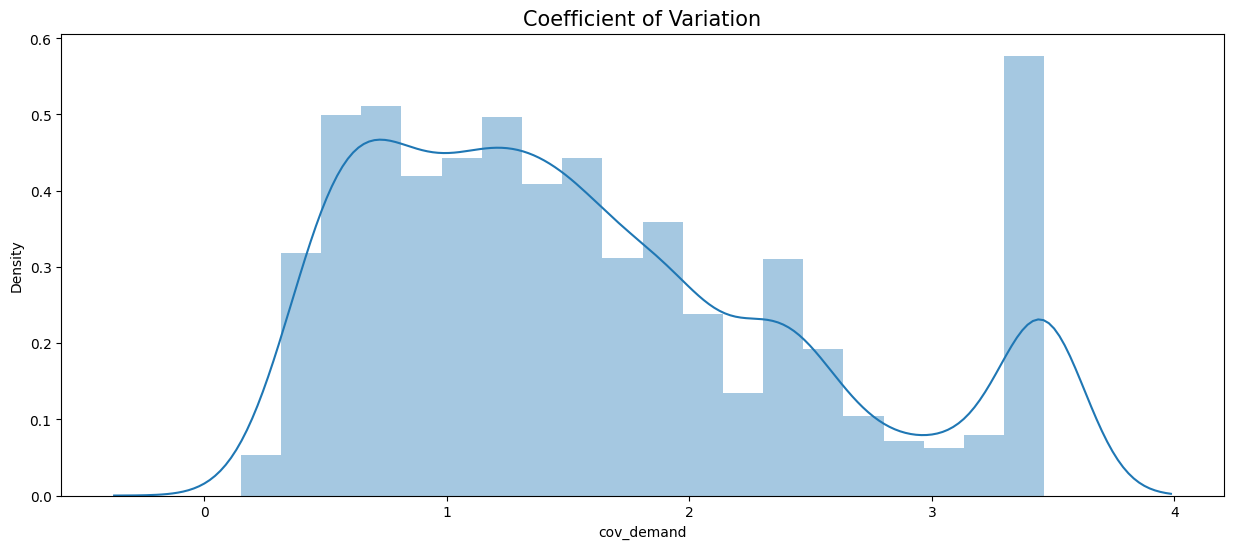

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.distplot(summarized_data_by_month['cov_demand']).set_title("Coefficient of Variation",fontsize=15)

As with ABC inventory analysis, you’re free to select your own parameters for the designation of SKUs into the XYZ classes. However, the most common approach is to use the Coefficient of Variation to guide you. Items with a CV of 0.5 or lower are very predictable and have stable sales all year round, so these go in Class X. Items with a CV of 0.5 to 1.0 are less predictable and harder to manage, so these go in Class Y. Finally, everything with a CV over 1 goes in Class Z, as it’s much harder to forecast and subject to fluctuations throughout the year, often because it only sells sporadically.

We’ll create a function to take the cov_demand value from our dataframe and then assign the relevant Class based on the Coefficient of Variation XYZ rules we defined above. If you use value_counts() you’ll get a quick summary of the numbers of SKUs in each class. As we can see from the above graph, we’ve only got 276 in the highly predictable Class X, plus 920 in the less predictable Class Y, while we have a hard to manage 2672 in Class Z.

In [ ]:
def xyz_classify_product(cov):
    """Apply an XYZ classification to each product based on 
    its coefficient of variation in order quantity.

    :param cov: Coefficient of variation in order quantity for SKU
    :return: XYZ inventory classification class
    """

    if cov <= 0.5:
        return 'X'
    elif cov > 0.5 and cov <= 1.0:
        return 'Y'
    else:
        return 'Z'

In [ ]:
summarized_data_by_month['xyz_class'] = summarized_data_by_month['cov_demand'].apply(xyz_classify_product)
summarized_data_by_month.xyz_class.value_counts()

xyz_class
Z    2672
Y     920
X     276
Name: count, dtype: int64

In [ ]:
summarized_data_by_month.groupby('xyz_class').agg(
    total_skus=('Item_Description', 'nunique'),
    total_demand=('total_demand', 'sum'),    
    std_demand=('std_demand', 'mean'),      
    avg_demand=('average_demand', 'mean'),
    avg_cov_demand=('cov_demand', 'mean'),
)

,total_skus,total_demand,std_demand,avg_demand,avg_cov_demand
xyz_class,,,,,
X,276,1192039.0,138.499385,359.915157,0.407118
Y,920,1853654.0,115.503680,167.903442,0.739825
Z,2672,1848590.0,95.832049,57.653131,2.020517


In [ ]:
df_monthly = summarized_data_by_month.groupby('xyz_class').agg(
    month_1=('month_1', 'sum'),
    month_2=('month_2', 'sum'),
    month_3=('month_3', 'sum'),
    month_4=('month_4', 'sum'),
    month_5=('month_5', 'sum'),
    month_6=('month_6', 'sum'),
    month_7=('month_7', 'sum'),
    month_8=('month_8', 'sum'),
    month_9=('month_9', 'sum'),
    month_10=('month_10', 'sum'),
    month_11=('month_11', 'sum'),
    month_12=('month_12', 'sum'),
)
df_monthly.head()

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
xyz_class,,,,,,,,,,,,
X,87697.0,85663.0,120939.0,83228.0,107723.0,99659.0,91359.0,104804.0,114026.0,102332.0,113784.0,80825.0
Y,113894.0,117029.0,155690.0,141848.0,174085.0,156796.0,153048.0,158294.0,184535.0,180050.0,200524.0,117861.0
Z,147556.0,62946.0,71915.0,67149.0,91877.0,107244.0,125025.0,135840.0,246338.0,311526.0,367580.0,113594.0


For plotting, we need to convert the data from wide format to long format, so we’ll use the unstack() function to create a long dataframe, then we’ll reset the index and rename the columns to match the underlying data.

In [ ]:
df_monthly_unstacked = df_monthly.unstack('xyz_class').to_frame()
df_monthly_unstacked = df_monthly_unstacked.reset_index().rename(columns={'level_0': 'month', 0: 'demand'})
df_monthly_unstacked.head()

,month,xyz_class,demand
0,month_1,X,87697.0
1,month_1,Y,113894.0
2,month_1,Z,147556.0
3,month_2,X,85663.0
4,month_2,Y,117029.0


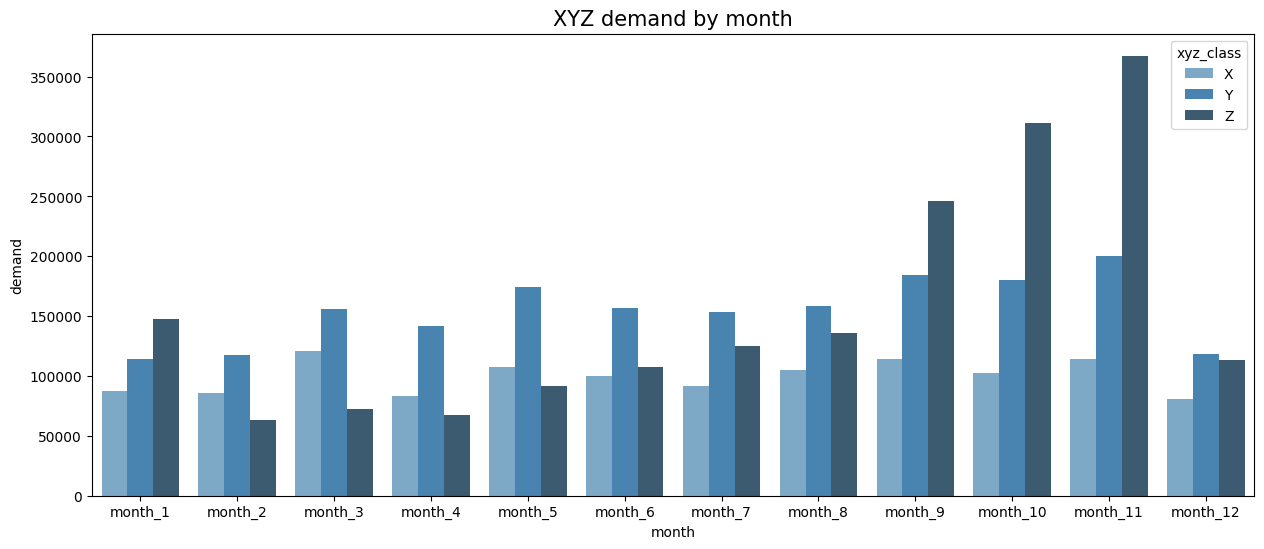

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="month", 
                 y="demand", 
                 hue="xyz_class", 
                 data=df_monthly_unstacked,
                 palette="Blues_d")\
                .set_title("XYZ demand by month",fontsize=15)

As depicted in the graph, the 'x' category of products exhibits minimal monthly fluctuations, whereas the 'y' category experiences more volatile monthly changes. On the other hand, capturing the fluctuating changes in the 'z' category proves to be more challenging.

Creating the ABC-XYZ class Now we’ve got the data all in one place, we can create the ABC-XYZ class designations by concatenating the string value of the abc_class to the xyz_class. We’ll then create a new dataframe of summary statistics by grouping on the new abc_xyz_class and calculating the number of SKUs, the demand volume, the average demand, and the total revenue by class

In [ ]:
#Merging abc and xyz category
df_abc_xyz = data_abc_by_multi_criteria.merge(summarized_data_by_month[['Item_Description','std_demand','total_demand','average_demand','cov_demand','xyz_class']], left_on='skus',right_on='Item_Description',how='left')
df_abc_xyz.head()

,skus,sales,revenue,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix,abc_rank,Item_Description,std_demand,total_demand,average_demand,cov_demand,xyz_class
0,REGENCY CAKESTAND 3 TIER,12020,138047.92,0.002456,0.181976,0.016448,0.016448,A,A,A_A,1,REGENCY CAKESTAND 3 TIER,248.377401,12020.0,1001.666667,0.247964,X
1,WHITE HANGING HEART T-LIGHT HOLDER,35980,98452.36,0.007351,0.043293,0.011730,0.028178,A,A,A_A,2,WHITE HANGING HEART T-LIGHT HOLDER,1302.885213,35980.0,2998.333333,0.434536,X
2,JUMBO BAG RED RETROSPOT,45126,83200.38,0.009220,0.035941,0.009913,0.038090,A,A,A_A,3,JUMBO BAG RED RETROSPOT,1267.376783,45126.0,3760.500000,0.337023,X
3,MEDIUM CERAMIC TOP STORAGE JAR,77729,81213.22,0.015882,0.015882,0.009676,0.047766,A,A,A_A,4,MEDIUM CERAMIC TOP STORAGE JAR,21333.740133,77729.0,6477.416667,3.293557,Z
4,POSTAGE,2997,75043.96,0.000612,0.605935,0.008941,0.056707,A,A,A_A,5,POSTAGE,84.507262,2997.0,249.750000,0.338367,X


In [ ]:
df_abc_xyz['abc_xyz_class'] = df_abc_xyz['revenue_category'].astype(str) + df_abc_xyz['xyz_class'].astype(str)

In [ ]:
df_abc_xyz_summary = df_abc_xyz.groupby('abc_xyz_class').agg(
    total_skus=('skus', 'nunique'),
    total_demand=('total_demand', sum),
    average_demand=('average_demand', 'mean'),    
    total_revenue=('revenue', sum),    
).reset_index()

df_abc_xyz_summary.sort_values(by='total_revenue', ascending=False)

,abc_xyz_class,total_skus,total_demand,average_demand,total_revenue
1,AY,329,1309821.0,331.768237,2793221.440
2,AZ,310,913363.0,245.527688,2112011.000
0,AX,178,1061301.0,496.863764,1807626.030
5,BZ,552,593963.0,89.668327,709705.880
4,BY,327,429364.0,109.086382,439586.310
8,CZ,1812,346515.0,15.839962,312053.774
3,BX,79,118441.0,124.937764,110722.700
7,CY,264,120826.0,37.291975,99272.520
6,CX,19,12297.0,53.934211,9015.460


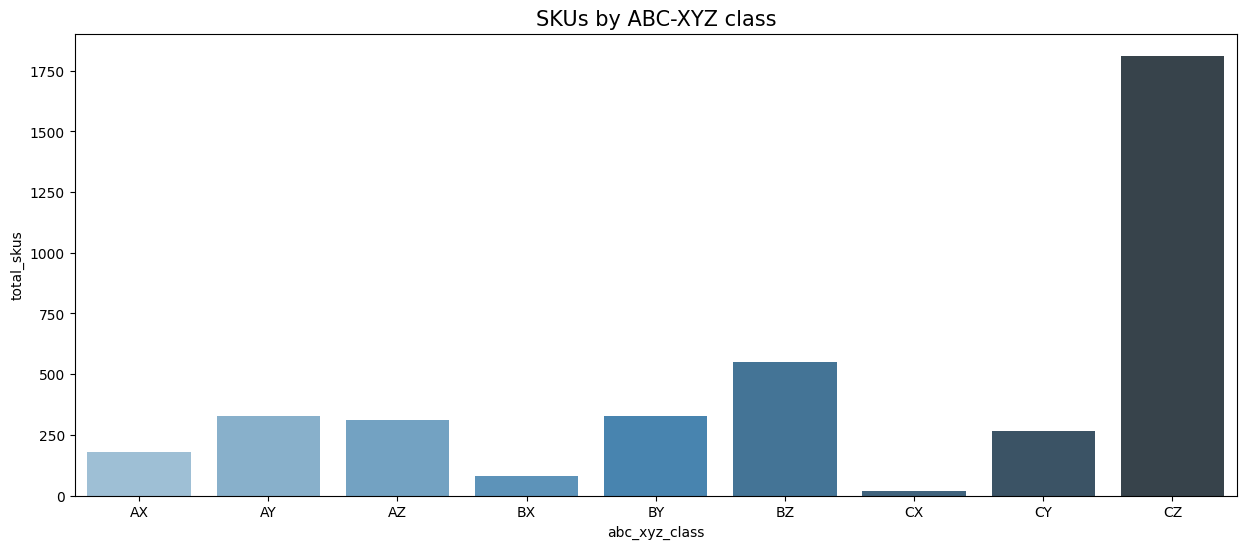

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_xyz_class", 
                 y="total_skus", 
                 data=df_abc_xyz_summary,
                 palette="Blues_d")\
                .set_title("SKUs by ABC-XYZ class",fontsize=15)

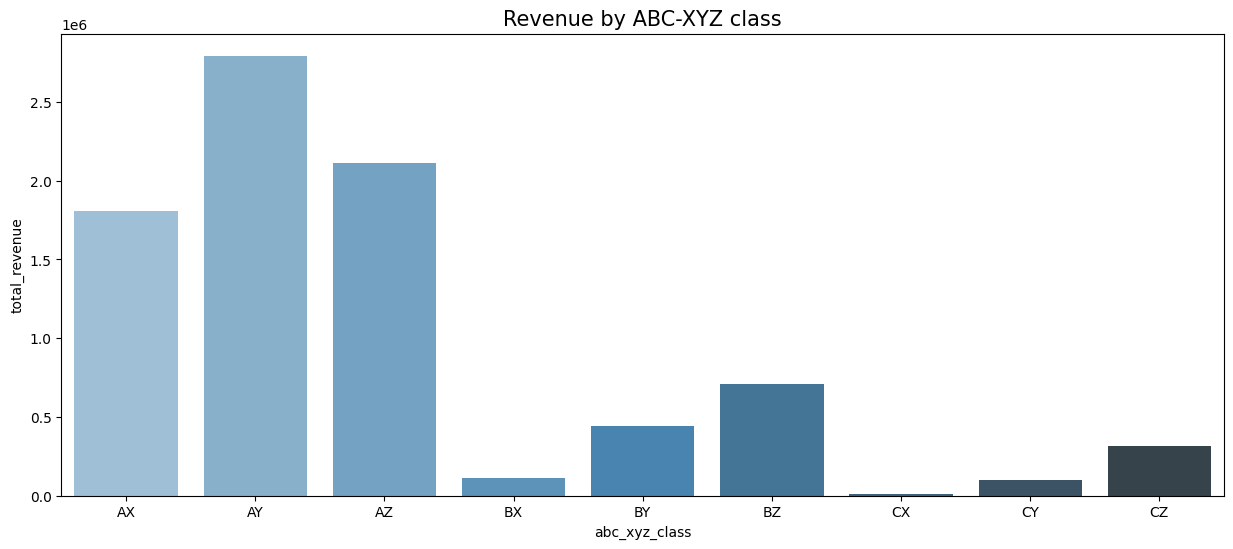

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_xyz_class", 
                 y="total_revenue", 
                 data=df_abc_xyz_summary, 
                 palette="Blues_d")\
                .set_title("Revenue by ABC-XYZ class",fontsize=15)

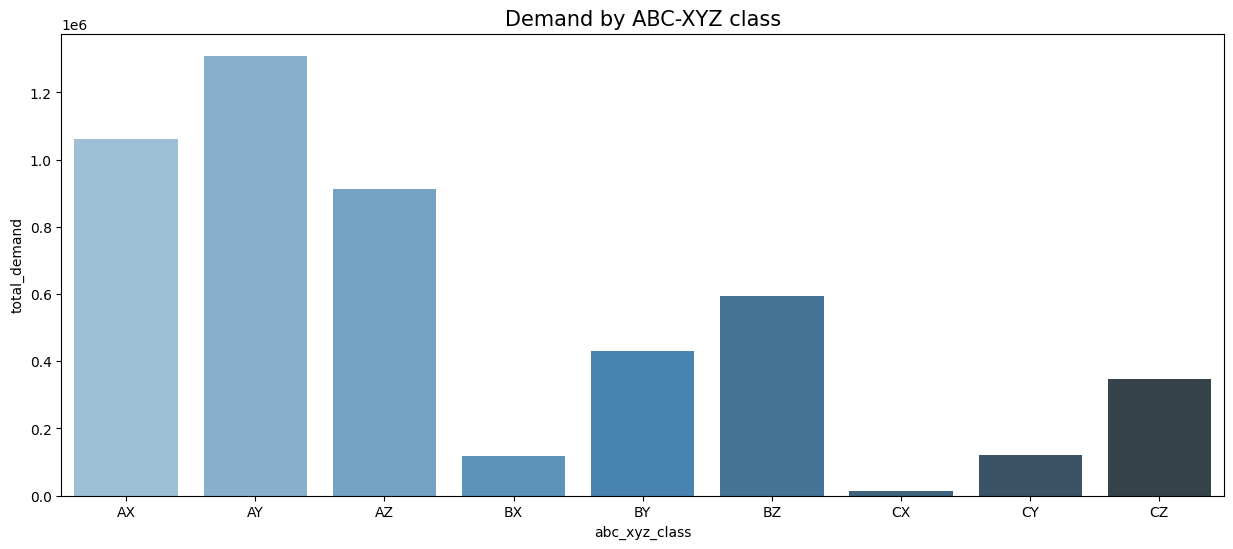

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_xyz_class", 
                 y="total_demand", 
                 data=df_abc_xyz_summary, 
                 palette="Blues_d")\
                .set_title("Demand by ABC-XYZ class",fontsize=15)

### Understanding the ABC XYZ classes

By combining the ABC and XYZ data we generate nine distinct classes. The Classes with an A prefix all contribute high amounts of revenue, the B Classes contribute medium revenue and the C Classes contribute low revenue.

Similarly, the X suffixed Classes have steady demand and are easy to forecast and manage. The Y suffixed Classes have variable but predictable demand so are harder to manage than the X Classes, but still easily doable. The Z Classes are the toughest of all. They’re sold sporadically and in varying volumes, so they’re harder to forecast and harder to manage.

Chances are, your operations and procurement team will already understand how to apply ABC XYZ inventory classification, given that it’s the industry standard and is included within major platforms such as SAP.

- AX High value Steady demand Easy to forecast Easy to manage
- AY High value Variable demand Harder to forecast Harder to manage
- AZ High value Sporadic demand Difficult to forecast Difficult to manage
- BX Medium value Steady demand Easy to forecast Easy to manage
- BY Medium value Variable demand Harder to forecast Harder to manage
- BZ Medium value Sporadic demand Difficult to forecast Difficult to manage
- CX Low value Steady demand Easy to forecast Easy to manage
- CY Low value Variable demand Harder to forecast Harder to manage
- CZ Low value Sporadic demand Difficult to forecast Difficult to manage

### Management approaches (Recommondation)

- The simplest solution to avoiding stock-outs is to simply hold more stock by increasing your buffer inventory levels. This has many advantages: You’ll lose fewer sales, so AOVs and revenue will be higher; you’ll likely see better customer retention and higher levels of satisfaction because customers don’t go elsewhere when they see an item is out of stock, and you won’t need to procure expensive emergency replenishment stock and erode your margin.

- However, holding higher stocks also has some disadvantages: You’ll need to spend more on stock; you’ll have more capital tied up in stock; you’ll need more space, equipment, and staff to handle the stock; insurance costs will go up with your stock valuation. What’s needed, therefore, is a compromise which sits somewhere in the middle.

- ABC XYZ inventory management is just one of a wide range of commonly used inventory control systems in operations management (including HML, VED, SDF, SOS, GOLF, and FNS), each of which sets out to solve some of the specific issues that can arise with different types of inventory, including the impact of a stock out on production.

------------------------End of Project-----------------------